In [4]:
import copy

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import torch

import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2

from src.config import DATA_PATH
from src.dataset import ImageDataset
from src.aug_dataset import AugImageDataset

from src.transform import train_transform
from src.augment import train_augmentation

In [5]:
df = pd.read_csv(DATA_PATH + 'train.csv')

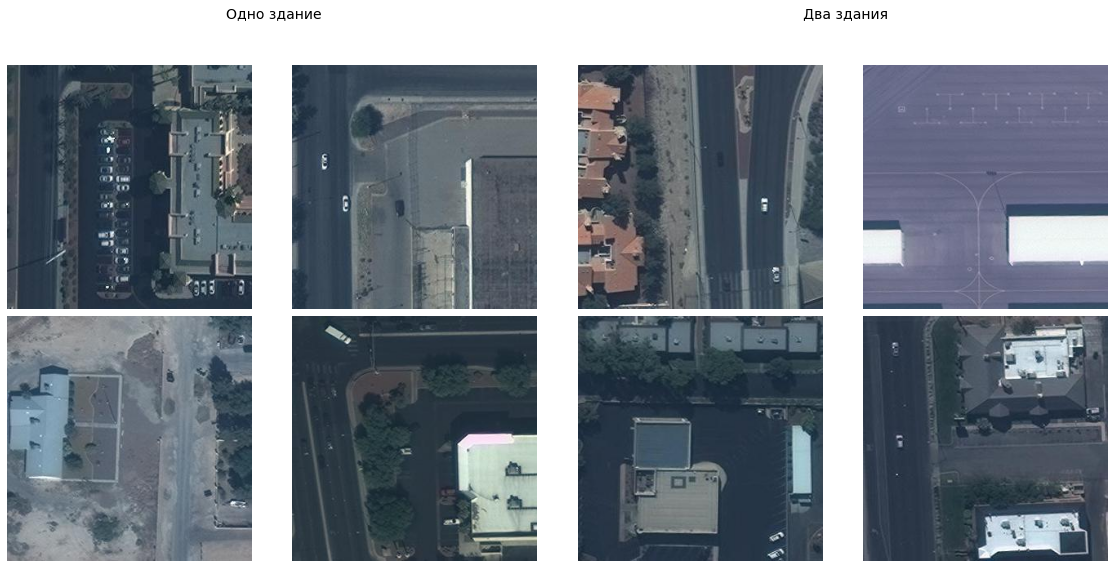

In [6]:
fig, axs = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle(f'Одно здание {" " * 105} Два здания', fontsize=14)

for i, n in zip(range(4), df[df['number_of_houses'] == 1].sample(4, random_state=42)['img_num']):
    axs[i // 2, (i % 2)].imshow(plt.imread(f"{DATA_PATH}/train/{n}"))
    axs[i // 2, (i % 2)].axis('off')

for i, n in zip(range(4), df[df['number_of_houses'] == 2].sample(4, random_state=42)['img_num']):
    axs[i // 2, (i % 2) + 2].imshow(plt.imread(f"{DATA_PATH}/train/{n}"))
    axs[i // 2, (i % 2) + 2].axis('off')

fig.tight_layout()
fig.subplots_adjust(top=0.88)

In [ ]:
data = ImageDataset(df, transform=train_transform)
aug_data = AugImageDataset(df, transform=train_augmentation)

In [ ]:
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(data), size=(1,)).item()
    img, label = data[sample_idx]
    inp = img.numpy().transpose((1, 2, 0))
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(inp)
plt.show()

In [ ]:
samples=10
cols=5
idx = np.random.randint(len(data))
dataset = copy.deepcopy(aug_data)
dataset.transform = A.Compose([t for t in dataset.transform if not isinstance(t, (A.Normalize, ToTensorV2))])
rows = samples // cols
figure, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12, 6))
for i in range(samples):
    image, _ = dataset[idx]
    ax.ravel()[i].imshow(image)
    ax.ravel()[i].set_axis_off()
plt.tight_layout()
plt.show()